FFR 120  
Felix Waldschock

HW 4
Exercise 14.5
## Sympletic Euler Integration of the Lotka-Volterra model

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange


# a.) Sympletic Euler
One variable is explicit one is implicit

In [72]:
# parameters
alpha = 2/3
beta = 4/3
delta = 1
gamma = 1

# initial conditions
x0 = 1
y0 = 1
dT = 0.01
tMax = 20 

N = int(tMax/dT)

In [73]:
def XexYim(alpha, beta, delta, gamma, dT):
    x = np.zeros(N)
    y = np.zeros(N)
    x[0] = x0
    y[0] = y0
    for i in range(N-1):
        x[i+1] = x[i] * (1 + dT * (alpha - ((beta * y[i])/(1-dT * (delta * x[i] - gamma)))))
        y[i+1] = y[i] / (1- dT * (delta * x[i] - gamma))

    return x, y

def XimYex(alpha, beta, delta, gamma, dT):
    x = np.zeros(N)
    y = np.zeros(N)
    x[0] = x0
    y[0] = y0
    for i in range(N-1):
        x[i+1] = x[i] / (1 - dT * (alpha - beta * y[i]))
        y[i+1] = y[i] * (1 + dT * ((delta * x[i])/(1- dT * (alpha - beta * y[i])) - gamma))

    return x, y

In [74]:
# compute the trajectories
x1, y1 = XexYim(alpha, beta, delta, gamma, dT)
x2, y2 = XimYex(alpha, beta, delta, gamma, dT)
t = np.linspace(0, N*dT , N)


# c.) 
Compute the invariant
- Is it constant in time? -> Yes it is

In [75]:
def conservedQuantity(x, y):
    return delta * x - gamma * np.log(x) + beta * y - alpha * np.log(y)

In [76]:
C_1 = conservedQuantity(x1, y1)
C_2 = conservedQuantity(x2, y2)

# Visualize

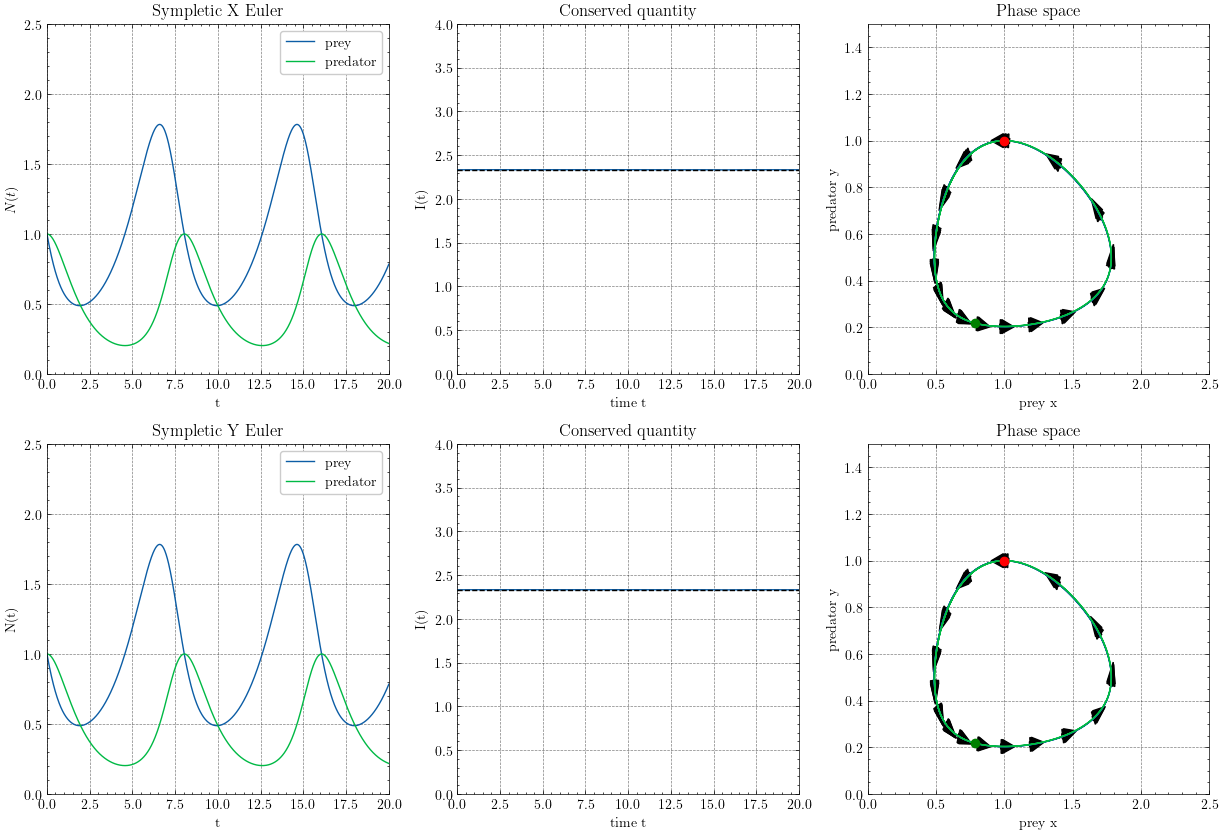

In [78]:
# Plot the data
# create a subplot with 1x3 grid and set the size to 15x5
fig, ax = plt.subplots(2, 3, figsize=(15,10))

ax[0,0].plot(t, x1, label= 'prey')
ax[0,0].plot(t, y1, label='predator')
ax[0,0].set_xlabel('t')
ax[0,0].set_ylabel('$N(t)$')
ax[0,0].set_title('Sympletic X Euler')
ax[0,0].legend()
ax[0,0].set_xlim(0, tMax)
ax[0,0].set_ylim(0, 2.5)

# second plot -> Conserved quantitity I(x,y)
ax[0,1].plot(t, C)
ax[0,1].set_xlabel('time t')
ax[0,1].set_ylabel('I(t)')
ax[0,1].set_title('Conserved quantity')
# plot a horizontal line at the initial value
ax[0, 1].axhline(C[0], color='black', linestyle='--')
ax[0,1].set_xlim(0, tMax)
ax[0,1].set_ylim(0, 4)

# third plot -> phase space
ax[0,2].plot(x1, y1)
ax[0,2].plot(x2, y2)
ax[0,2].set_xlabel('prey x')
ax[0,2].set_ylabel('predator y')
ax[0,2].set_title('Phase space')
ax[0,2].set_xlim(0, 2.5)
ax[0,2].set_ylim(0, 1.5)

# mark the initial position with a red dot, and the final position with a green dot
ax[0,2].plot(x0, y0, 'ro')
ax[0,2].plot(x1[-1], y1[-1], 'go')

# show the direction of the flow with some arrows on the trajectory
for i in range(0, N, 50):
    ax[0,2].arrow(x1[i], y1[i], x1[i+1]-x1[i], y1[i+1]-y1[i], width=0.02, color='black')


# for XimYex
ax[1,0].plot(t, x1, label='prey')
ax[1,0].plot(t, y1, label='predator')
ax[1,0].set_xlabel('t')
ax[1,0].set_ylabel('N(t)')
ax[1,0].set_title('Sympletic Y Euler')
ax[1,0].legend()
ax[1,0].set_xlim(0, tMax)
ax[1,0].set_ylim(0, 2.5)
# s1cond plot -> Conserved quantitity I(x,y)
ax[1,1].plot(t, C)
ax[1,1].set_xlabel('time t')
ax[1,1].set_ylabel('I(t)')
ax[1,1].set_title('Conserved quantity')
# plot a horizontal line at the initial value
ax[1,1].axhline(C[0], color='black', linestyle='--')
ax[1,1].set_xlim(0, tMax)
ax[1,1].set_ylim(0, 4)
# t1ird plot -> phase space
ax[1,2].plot(x1, y1)
ax[1,2].plot(x2, y2)
ax[1,2].set_xlabel('prey x')
ax[1,2].set_ylabel('predator y')
ax[1,2].set_title('Phase space')
ax[1,2].set_xlim(0, 2.5)
ax[1,2].set_ylim(0, 1.5)

# m1rk the initial position with a red dot, and the final position with a green dot
ax[1,2].plot(x0, y0, 'ro')
ax[1,2].plot(x1[-1], y1[-1], 'go')

# show the direction of the flow with some arrows on the trajectory
for i in range(0, N, 50):
    ax[1,2].arrow(x2[i], y2[i], x2[i+1]-x2[i], y2[i+1]-y2[i], width=0.02, color='black')

